In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [5]:
# Display the first few rows of movies and ratings dataframes
print(movies.head())
print(ratings.head())

# Display the dataset information
print(movies.info())
print(ratings.info())

# Get summary statistics
print(ratings.describe())

# Check for missing values
print(movies.isnull().sum())
print(ratings.isnull().sum())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----

In [6]:
# Handle missing values (if any)
movies.dropna(inplace=True)
ratings.dropna(inplace=True)

# Verify cleaning
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
# Merge datasets on 'movieId'
df = pd.merge(ratings, movies, on='movieId')

# Display the first few rows of the merged dataframe
print(df.head())

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


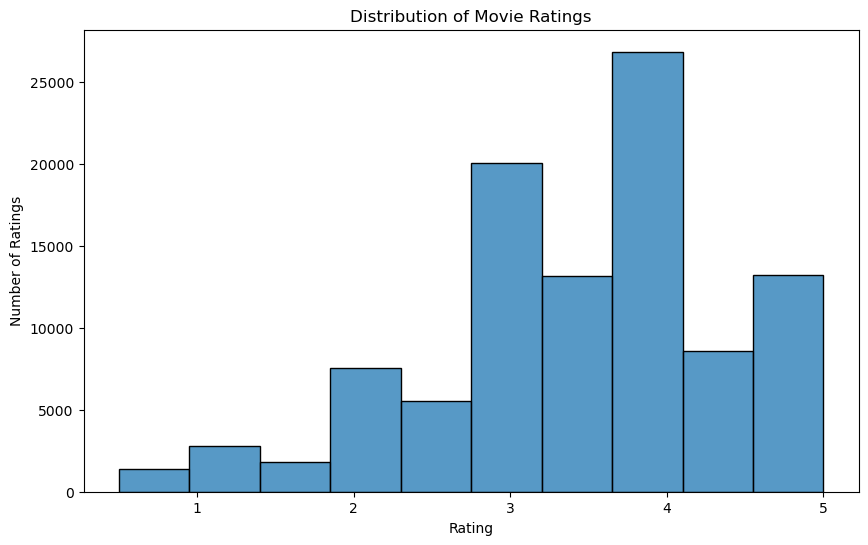

In [8]:
# Plot the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [9]:
# Calculate the average rating for each movie
movie_ratings = df.groupby('title')['rating'].mean()

# Calculate the number of ratings for each movie
movie_ratings_count = df.groupby('title')['rating'].count()

# Create a DataFrame with both average rating and number of ratings
ratings_summary = pd.DataFrame({'average_rating': movie_ratings, 'number_of_ratings': movie_ratings_count})

# Filter out movies with less than a certain number of ratings (e.g., 100)
popular_movies = ratings_summary[ratings_summary['number_of_ratings'] >= 100]

# Sort by average rating
top_10_movies = popular_movies.sort_values(by='average_rating', ascending=False).head(10)

# Display top 10 highest rated movies
print(top_10_movies)

                                  average_rating  number_of_ratings
title                                                              
Shawshank Redemption, The (1994)        4.429022                317
Godfather, The (1972)                   4.289062                192
Fight Club (1999)                       4.272936                218
Godfather: Part II, The (1974)          4.259690                129
Departed, The (2006)                    4.252336                107
Goodfellas (1990)                       4.250000                126
Casablanca (1942)                       4.240000                100
Dark Knight, The (2008)                 4.238255                149
Usual Suspects, The (1995)              4.237745                204
Princess Bride, The (1987)              4.232394                142


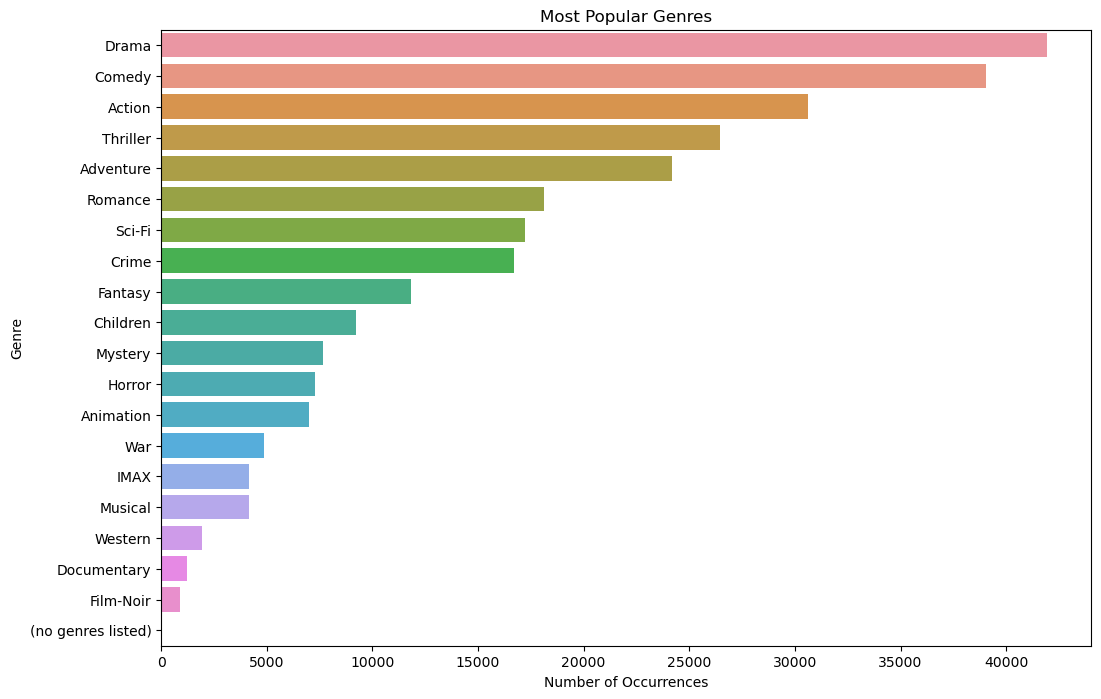

In [10]:
# Split genres and explode them into separate rows
df['genres'] = df['genres'].str.split('|')
df_genres = df.explode('genres')

# Count the number of occurrences of each genre
genre_counts = df_genres['genres'].value_counts()

# Plot the most popular genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Most Popular Genres')
plt.xlabel('Number of Occurrences')
plt.ylabel('Genre')
plt.show()